In [335]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap


In [336]:
#Data Collection
#Pull the data

df=pd.read_csv(r'PromosSample.csv', index_col=False, skipinitialspace = True)

In [337]:
#Check the dataset
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8.0,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4.0,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7.0,0,50.0,0


In [338]:
#Data Cleaning
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54804 non-null  object 
 5   recruitment_channel   54749 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  float64
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB


In [339]:
# Find duplicate rows
duplicate_bool = df.duplicated(subset=['employee_id'], keep='first')
duplicate = df.loc[duplicate_bool == True]
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           0 non-null      int64  
 1   department            0 non-null      object 
 2   region                0 non-null      object 
 3   education             0 non-null      object 
 4   gender                0 non-null      object 
 5   recruitment_channel   0 non-null      object 
 6   no_of_trainings       0 non-null      int64  
 7   age                   0 non-null      int64  
 8   previous_year_rating  0 non-null      float64
 9   length_of_service     0 non-null      float64
 10  awards_won?           0 non-null      int64  
 11  avg_training_score    0 non-null      float64
 12  is_promoted           0 non-null      int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 0.0+ bytes


In [340]:
#Check if there is any Null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     4
recruitment_channel       59
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [341]:
#There are missing values in training datasets and need to be handled
#Calculate the ratio of missing values

# saving missing values in a variable
a = df.isnull().sum()/len(df)*100

# saving column names in a variable
variables = df.columns

# new variable to store variables having missing values less than a threshold
variable = [ ]

for i in range(df.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

# creating a new dataframe using the above variables
new_data = df[variable]
new_data.head()

# percentage of missing values in each variable of new data
new_data.isnull().sum()/len(new_data)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.007298
recruitment_channel     0.107649
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [342]:
#Describe the dataset
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329272,5.865542,0.023172,63.386823,0.085170
std,22586.581449,0.609264,7.660169,1.260018,4.265121,0.150450,13.371482,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.800000,37.000000,1.000000,99.000000,1.000000


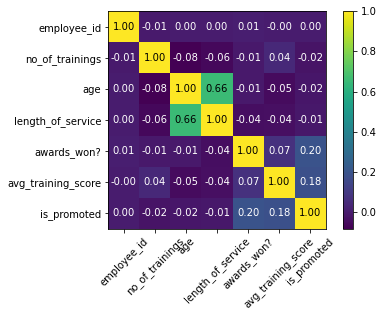

In [343]:
#Create a correlation matrix for numerical variables
cols=['employee_id','no_of_trainings','age','length_of_service','awards_won?','avg_training_score','is_promoted']
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.savefig('images/coef.png', dpi=300)
plt.show()

In [344]:
#Check the categorical variables
df.education.value_counts()


Bachelor's          36665
Master's & above    14925
Below Secondary       805
Bachelors               4
Name: education, dtype: int64

In [345]:
#Change Bachelors to Bachelor's in education column
df.loc[df["education"]=="Bachelors", "education"] = "Bachelor's"


In [346]:
df.education.value_counts()



Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [347]:
df.recruitment_channel.value_counts()

other       30387
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [348]:
df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [349]:
df.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [350]:
df.gender.value_counts()

m         38489
f         16268
FEMALE       34
Female        9
male          3
female        1
Name: gender, dtype: int64

In [351]:
#Replace full gender names with initials
mapping = [('FEMALE','f'), ('Female','f'), ('female','f'), ('male','m'), ('MALE','m'), ('Male','m'),]
for i,j in mapping:
    df.gender = df.gender.replace(i, j)

In [352]:
df.gender.value_counts()

m    38492
f    16312
Name: gender, dtype: int64

In [353]:
#Variation of promotion percentages with different columns
pd.crosstab(df['length_of_service'],df.is_promoted,normalize='index')

is_promoted,0,1
length_of_service,,
1.00,0.917088,0.082912
2.00,0.910968,0.089032
2.40,1.000000,0.000000
3.00,0.913408,0.086592
4.00,0.912509,0.087491
4.33,1.000000,0.000000
5.00,0.918553,0.081447
6.00,0.915294,0.084706
7.00,0.916411,0.083589


In [354]:
pd.crosstab(df['awards_won?'],df.is_promoted,normalize='index')

is_promoted,0,1
awards_won?,,
0,0.923251,0.076749
1,0.559843,0.440157


In [355]:
pd.crosstab(df.recruitment_channel,df.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916017,0.083983
referred,0.879159,0.120841
sourcing,0.914987,0.085013


In [356]:
pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')

is_promoted,0,1
previous_year_rating,,
1.0,0.985859,0.014141
2.0,0.957160,0.042840
3.0,0.927221,0.072779
4.0,0.920624,0.079376
5.0,0.836371,0.163629
5.8,1.000000,0.000000


In [357]:
pd.crosstab(df.recruitment_channel,df.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916017,0.083983
referred,0.879159,0.120841
sourcing,0.914987,0.085013


In [358]:
pd.pivot_table(df, index= ['education', 'department'], values='is_promoted')

is_promoted
education        department                    
Bachelor's       Analytics             0.093766
                 Finance               0.082850
                 HR                    0.047213
                 Legal                 0.052826
                 Operations            0.083151
                 Procurement           0.088322
                 R&D                   0.068266
                 Sales & Marketing     0.071538
                 Technology            0.107066
Below Secondary  Finance               0.056604
                 HR                    0.070312
                 Legal                 0.061538
                 Operations            0.062500
                 Procurement           0.046512
                 Technology            0.154229
Master's & above Analytics             0.108968
                 Finance               0.086172
                 HR                    0.073670
                 Legal                 0.038462
                 Operations            0.113112
                 Procurement           0.115173
                 R&D                   0.069930
                 Sales & Marketing     0.082093
                 Technology            0.105647

In [359]:
pd.pivot_table(df, index= ['recruitment_channel', 'department'], values='is_promoted')

is_promoted
recruitment_channel department                    
other               Analytics             0.090081
                    Finance               0.076027
                    HR                    0.050073
                    Legal                 0.050847
                    Operations            0.089502
                    Procurement           0.098697
                    R&D                   0.072072
                    Sales & Marketing     0.070697
                    Technology            0.108690
referred            Analytics             0.180723
                    Finance               0.000000
                    HR                    0.077670
                    Legal                 0.428571
                    Operations            0.096639
                    Procurement           0.227848
                    R&D                   0.052632
                    Sales & Marketing     0.131274
                    Technology            0.096491
sourcing            Analytics             0.099739
                    Finance               0.088951
                    HR                    0.063102
                    Legal                 0.039080
                    Operations            0.090664
                    Procurement           0.090285
                    R&D                   0.065882
                    Sales & Marketing     0.071595
                    Technology            0.107564

In [360]:
pd.pivot_table(df, index= ['gender', 'awards_won?'], values='is_promoted')

is_promoted
gender awards_won?             
f      0               0.081791
       1               0.441734
m      0               0.074619
       1               0.439512

In [361]:
#Handling the missing values
#Filling missing values of 'previous_year_rating' with mean based on 'awards_won?' 
# 'education' and 'recruitment_channel' with most frequent value based on 'department'
#'gender' with mode based on 'awards_won?'

df['previous_year_rating'] = df.groupby(["awards_won?"])["previous_year_rating"].apply(lambda x: x.fillna(x.mean())).round(1)
df['education'] = df.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))
df['recruitment_channel'] = df.groupby(["department"])["recruitment_channel"].apply(lambda x: x.fillna(x.value_counts().index[0]))
df['gender'] = df.groupby(["awards_won?"])["gender"].apply(lambda x: x.fillna(x.value_counts().index[0]))


In [362]:
#Check if there is any null values
df.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [363]:
#save the clean data
df.to_csv('data_cleaned.csv', index=False)